# Linear Transformations in Image Processing

## Theory

Linear transformations are the simplest form of point processing operations, following the general form:

$$s = ar + b$$

Where:
- $r$ = input pixel intensity (0-255)
- $s$ = output pixel intensity (0-255)
- $a$ = slope (controls **contrast**)
- $b$ = intercept (controls **brightness**)

### Key Properties

1. **Linear relationship** - Output is a linear function of input
2. **Predictable** - Easy to understand and control
3. **Fast** - Simple arithmetic operations
4. **Reversible** - Can recover original (if no clipping)

### Effects

- **$a > 1$**: Increases contrast (expands intensity range)
- **$a < 1$**: Decreases contrast (compresses intensity range)
- **$a = 1$**: No contrast change
- **$b > 0$**: Increases brightness (shifts upward)
- **$b < 0$**: Decreases brightness (shifts downward)
- **$b = 0$**: No brightness change

## Example 1: Brightness Adjustment

**Formula:** $s = r + b$ (where $a = 1$)

This simply adds a constant value to all pixels, shifting the entire intensity range up or down.

Original Image:
[[30 40 50 60]
 [35 45 55 65]
 [40 50 60 70]
 [45 55 65 75]]
Min: 30, Max: 75

After adding 50:
[[ 80  90 100 110]
 [ 85  95 105 115]
 [ 90 100 110 120]
 [ 95 105 115 125]]
Min: 80, Max: 125


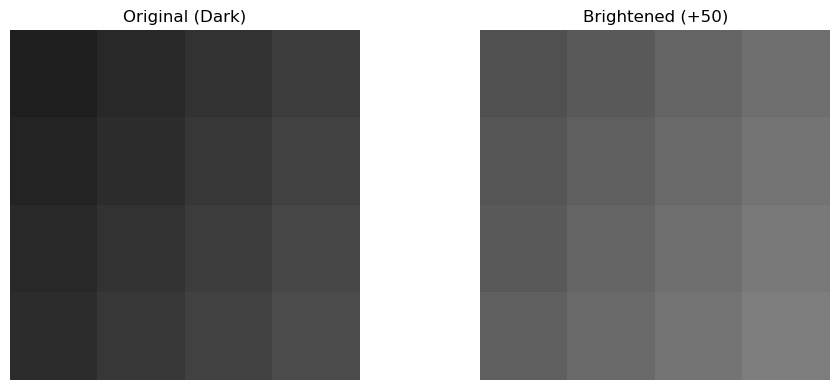

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dark image (4x4)
dark_image = np.array([
    [30, 40, 50, 60],
    [35, 45, 55, 65],
    [40, 50, 60, 70],
    [45, 55, 65, 75]
], dtype=np.uint8)

print("Original Image:")
print(dark_image)
print(f"Min: {dark_image.min()}, Max: {dark_image.max()}")

# Brightness adjustment: s = r + 50
brightness_increase = 50
bright_image = np.clip(dark_image + brightness_increase, 0, 255).astype(np.uint8)

print(f"\nAfter adding {brightness_increase}:")
print(bright_image)
print(f"Min: {bright_image.min()}, Max: {bright_image.max()}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(dark_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original (Dark)')
axes[0].axis('off')

axes[1].imshow(bright_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Brightened (+{brightness_increase})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Example 2: Contrast Adjustment

**Formula:** $s = ar$ (where $b = 0$)

This multiplies all pixels by a constant, scaling the intensity range.

Low Contrast Image:
[[ 80  90 100 110]
 [ 85  95 105 115]
 [ 90 100 110 120]
 [ 95 105 115 125]]
Range: 80 - 125

After multiplying by 1.5:
[[120 135 150 165]
 [127 142 157 172]
 [135 150 165 180]
 [142 157 172 187]]
Range: 120 - 187

After multiplying by 0.7:
[[56 62 70 77]
 [59 66 73 80]
 [62 70 77 84]
 [66 73 80 87]]
Range: 56 - 87


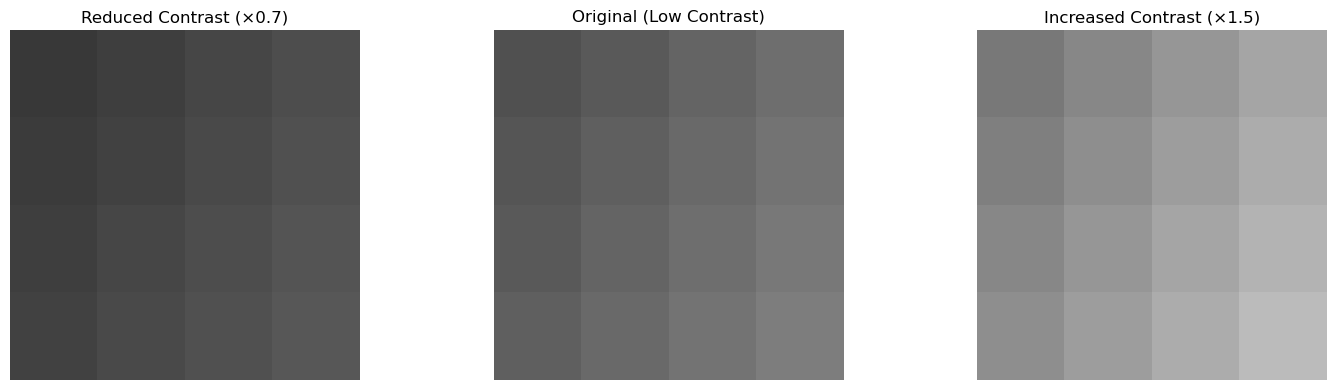

In [20]:
# Create a low contrast image
low_contrast_image = np.array([
    [80, 90, 100, 110],
    [85, 95, 105, 115],
    [90, 100, 110, 120],
    [95, 105, 115, 125]
], dtype=np.uint8)

print("Low Contrast Image:")
print(low_contrast_image)
print(f"Range: {low_contrast_image.min()} - {low_contrast_image.max()}")

# Increase contrast: s = 1.5 * r
contrast_factor = 1.5
high_contrast_image = np.clip(low_contrast_image * contrast_factor, 0, 255).astype(np.uint8)

print(f"\nAfter multiplying by {contrast_factor}:")
print(high_contrast_image)
print(f"Range: {high_contrast_image.min()} - {high_contrast_image.max()}")

# Decrease contrast: s = 0.7 * r
contrast_factor_low = 0.7
reduced_contrast = np.clip(low_contrast_image * contrast_factor_low, 0, 255).astype(np.uint8)

print(f"\nAfter multiplying by {contrast_factor_low}:")
print(reduced_contrast)
print(f"Range: {reduced_contrast.min()} - {reduced_contrast.max()}")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(reduced_contrast, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Reduced Contrast (×{contrast_factor_low})')
axes[0].axis('off')

axes[1].imshow(low_contrast_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Original (Low Contrast)')
axes[1].axis('off')

axes[2].imshow(high_contrast_image, cmap='gray', vmin=0, vmax=255)
axes[2].set_title(f'Increased Contrast (×{contrast_factor})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Example 3: Combined Transformation

**Formula:** $s = ar + b$

Combining both contrast and brightness adjustment for optimal results.

Poor Quality Image:
[[40 50 60 70]
 [45 55 65 75]
 [50 60 70 80]
 [55 65 75 85]]
Range: 40 - 85

After s = 1.8*r + 30:
[[102 120 138 156]
 [111 129 147 165]
 [120 138 156 174]
 [129 147 165 183]]
Range: 102 - 183


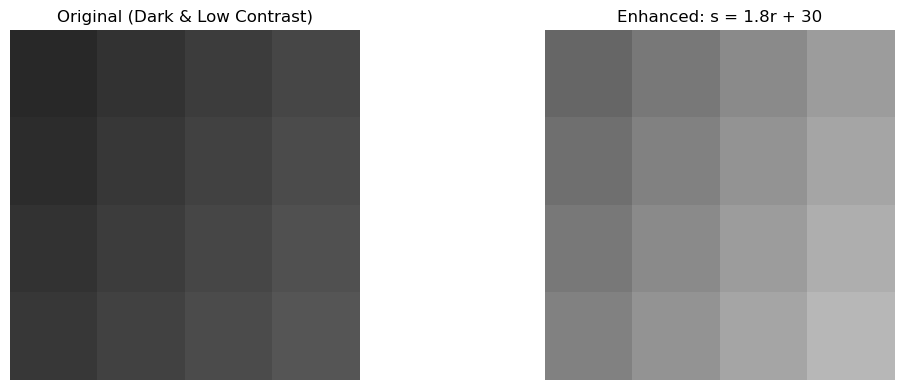

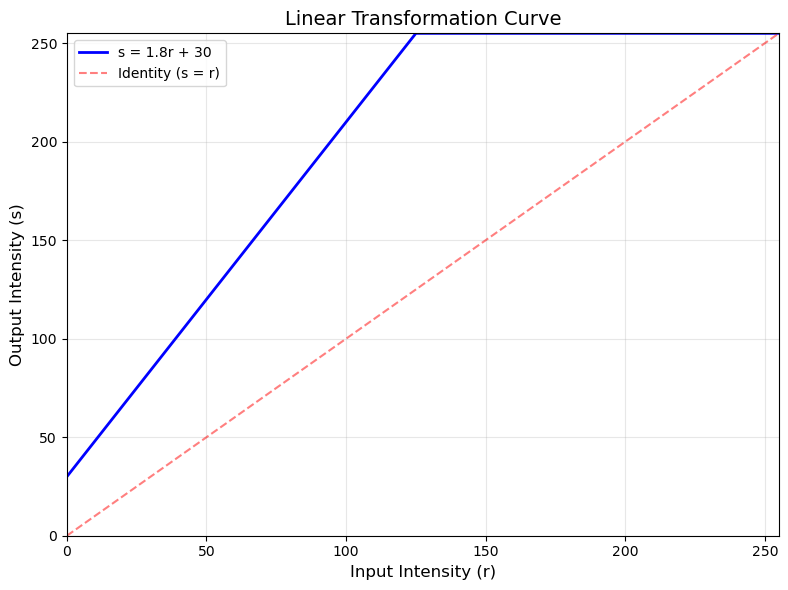

In [21]:
# Create a dark, low contrast image
poor_image = np.array([
    [40, 50, 60, 70],
    [45, 55, 65, 75],
    [50, 60, 70, 80],
    [55, 65, 75, 85]
], dtype=np.uint8)

print("Poor Quality Image:")
print(poor_image)
print(f"Range: {poor_image.min()} - {poor_image.max()}")

# Apply combined transformation: s = 1.8*r + 30
a = 1.8  # Increase contrast
b = 30   # Increase brightness
enhanced_image = np.clip(a * poor_image + b, 0, 255).astype(np.uint8)

print(f"\nAfter s = {a}*r + {b}:")
print(enhanced_image)
print(f"Range: {enhanced_image.min()} - {enhanced_image.max()}")

# Visualize the transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(poor_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original (Dark & Low Contrast)')
axes[0].axis('off')

axes[1].imshow(enhanced_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Enhanced: s = {a}r + {b}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show the transformation curve
r_values = np.arange(0, 256)
s_values = np.clip(a * r_values + b, 0, 255)

plt.figure(figsize=(8, 6))
plt.plot(r_values, s_values, 'b-', linewidth=2, label=f's = {a}r + {b}')
plt.plot([0, 255], [0, 255], 'r--', alpha=0.5, label='Identity (s = r)')
plt.xlabel('Input Intensity (r)', fontsize=12)
plt.ylabel('Output Intensity (s)', fontsize=12)
plt.title('Linear Transformation Curve', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.show()

## Example 4: Real Image Enhancement

Applying linear transformation to a synthetic grayscale image to demonstrate practical enhancement.

Original Image Range: 40 - 119
Brightness Only Range: 100 - 179
Contrast Only Range: 80 - 238
Combined Range: 98 - 255


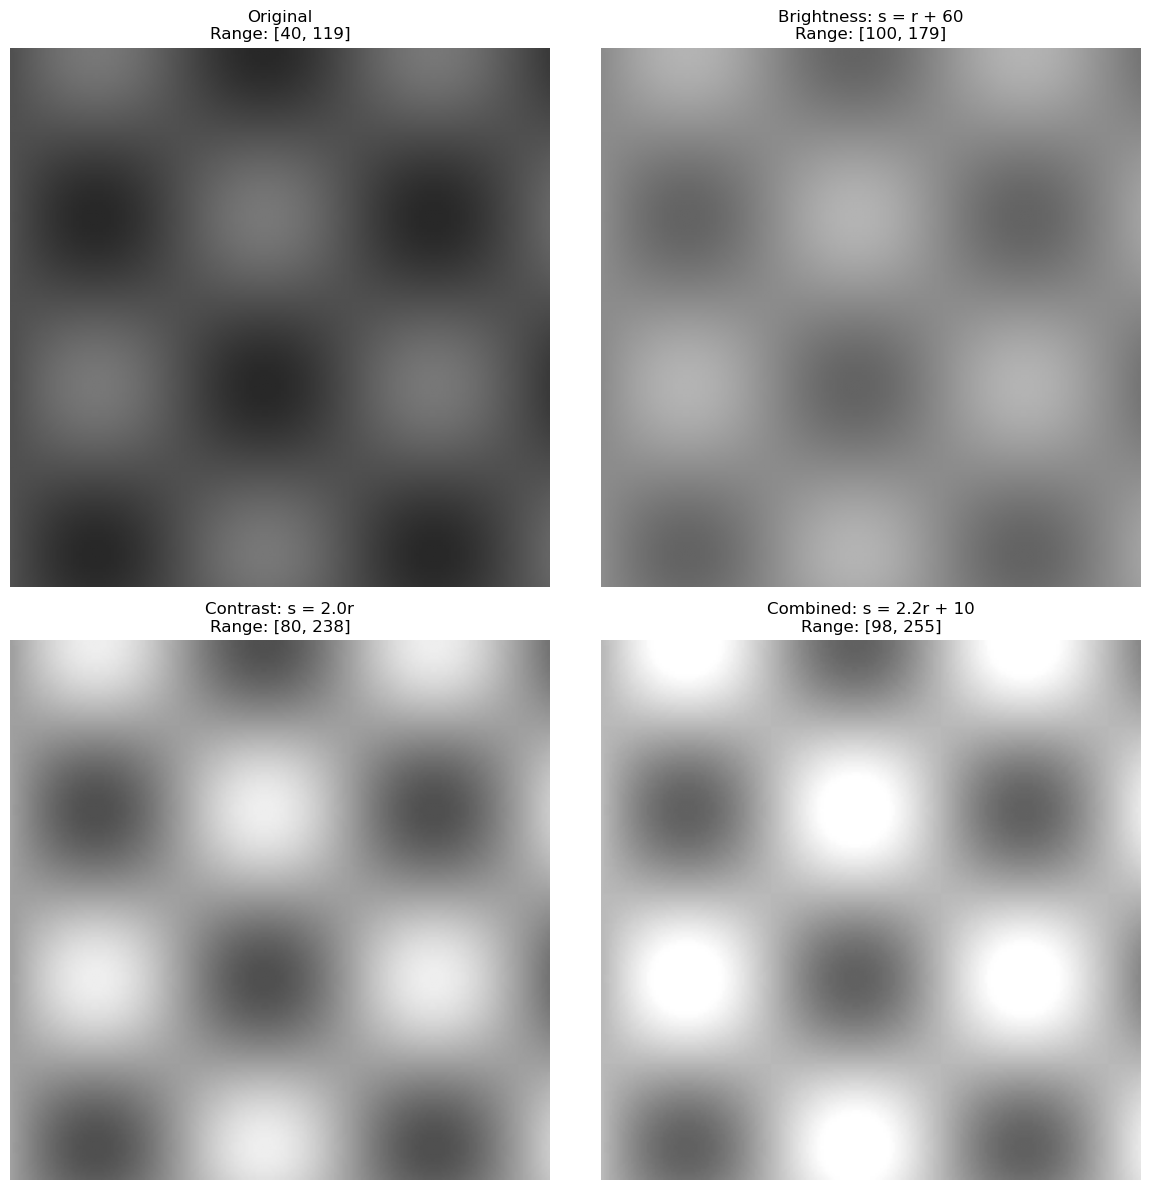

In [22]:
# Create a synthetic grayscale image (gradient + pattern)
height, width = 200, 200

# Create horizontal gradient
x = np.linspace(0, 1, width)
y = np.linspace(0, 1, height)
X, Y = np.meshgrid(x, y)

# Create a pattern
pattern = np.sin(X * 10) * np.cos(Y * 10)

# Combine and normalize to [40, 120] range (low contrast, dark)
synthetic_image = ((pattern + 1) / 2 * 80 + 40).astype(np.uint8)

print(f"Original Image Range: {synthetic_image.min()} - {synthetic_image.max()}")

# Apply different linear transformations
# 1. Only brightness
bright_only = np.clip(synthetic_image + 60, 0, 255).astype(np.uint8)

# 2. Only contrast
contrast_only = np.clip(synthetic_image * 2.0, 0, 255).astype(np.uint8)

# 3. Combined (best result)
combined = np.clip(synthetic_image * 2.2 + 10, 0, 255).astype(np.uint8)

print(f"Brightness Only Range: {bright_only.min()} - {bright_only.max()}")
print(f"Contrast Only Range: {contrast_only.min()} - {contrast_only.max()}")
print(f"Combined Range: {combined.min()} - {combined.max()}")

# Visualize all transformations
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0, 0].imshow(synthetic_image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title(f'Original\nRange: [{synthetic_image.min()}, {synthetic_image.max()}]', fontsize=12)
axes[0, 0].axis('off')

axes[0, 1].imshow(bright_only, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title(f'Brightness: s = r + 60\nRange: [{bright_only.min()}, {bright_only.max()}]', fontsize=12)
axes[0, 1].axis('off')

axes[1, 0].imshow(contrast_only, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title(f'Contrast: s = 2.0r\nRange: [{contrast_only.min()}, {contrast_only.max()}]', fontsize=12)
axes[1, 0].axis('off')

axes[1, 1].imshow(combined, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title(f'Combined: s = 2.2r + 10\nRange: [{combined.min()}, {combined.max()}]', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Example 5: Histogram Analysis

Visualizing how linear transformations affect the intensity distribution.

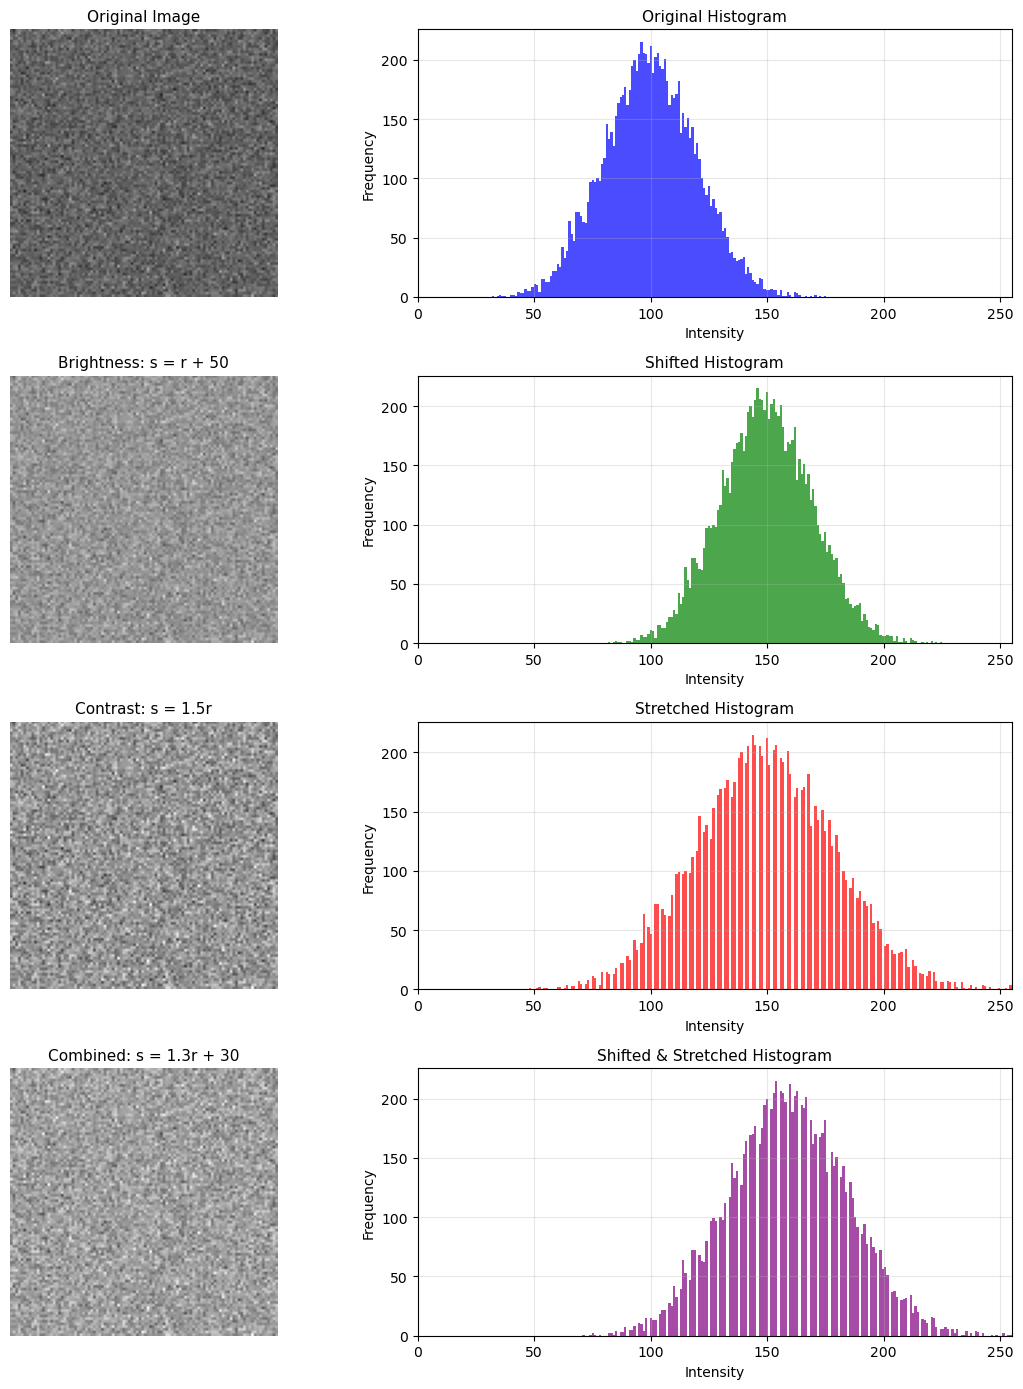

Histogram Statistics:
Original     - Mean: 99.7, Std: 19.8
Brightness   - Mean: 149.7, Std: 19.8
Contrast     - Mean: 149.3, Std: 29.7
Combined     - Mean: 159.2, Std: 25.8


In [23]:
# Create test image with specific intensity distribution
test_image = np.random.normal(100, 20, (100, 100))  # Mean=100, Std=20
test_image = np.clip(test_image, 0, 255).astype(np.uint8)

# Apply transformations
brightness_adj = np.clip(test_image + 50, 0, 255).astype(np.uint8)
contrast_adj = np.clip(test_image * 1.5, 0, 255).astype(np.uint8)
combined_adj = np.clip(test_image * 1.3 + 30, 0, 255).astype(np.uint8)

# Create figure with images and histograms
fig, axes = plt.subplots(4, 2, figsize=(12, 14))

# Original
axes[0, 0].imshow(test_image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original Image', fontsize=11)
axes[0, 0].axis('off')

axes[0, 1].hist(test_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
axes[0, 1].set_title('Original Histogram', fontsize=11)
axes[0, 1].set_xlim(0, 255)
axes[0, 1].set_xlabel('Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Brightness adjusted
axes[1, 0].imshow(brightness_adj, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Brightness: s = r + 50', fontsize=11)
axes[1, 0].axis('off')

axes[1, 1].hist(brightness_adj.ravel(), bins=256, range=(0, 255), color='green', alpha=0.7)
axes[1, 1].set_title('Shifted Histogram', fontsize=11)
axes[1, 1].set_xlim(0, 255)
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

# Contrast adjusted
axes[2, 0].imshow(contrast_adj, cmap='gray', vmin=0, vmax=255)
axes[2, 0].set_title('Contrast: s = 1.5r', fontsize=11)
axes[2, 0].axis('off')

axes[2, 1].hist(contrast_adj.ravel(), bins=256, range=(0, 255), color='red', alpha=0.7)
axes[2, 1].set_title('Stretched Histogram', fontsize=11)
axes[2, 1].set_xlim(0, 255)
axes[2, 1].set_xlabel('Intensity')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(True, alpha=0.3)

# Combined
axes[3, 0].imshow(combined_adj, cmap='gray', vmin=0, vmax=255)
axes[3, 0].set_title('Combined: s = 1.3r + 30', fontsize=11)
axes[3, 0].axis('off')

axes[3, 1].hist(combined_adj.ravel(), bins=256, range=(0, 255), color='purple', alpha=0.7)
axes[3, 1].set_title('Shifted & Stretched Histogram', fontsize=11)
axes[3, 1].set_xlim(0, 255)
axes[3, 1].set_xlabel('Intensity')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Histogram Statistics:")
print(f"Original     - Mean: {test_image.mean():.1f}, Std: {test_image.std():.1f}")
print(f"Brightness   - Mean: {brightness_adj.mean():.1f}, Std: {brightness_adj.std():.1f}")
print(f"Contrast     - Mean: {contrast_adj.mean():.1f}, Std: {contrast_adj.std():.1f}")
print(f"Combined     - Mean: {combined_adj.mean():.1f}, Std: {combined_adj.std():.1f}")

## Example 6: Image Negation (Special Case)

**Image negation is a linear transformation!**

**Formula:** $s = 255 - r$ (for 8-bit images)

**Rewritten in linear form:** $s = -1 \cdot r + 255$

This matches $s = ar + b$ where:
- $a = -1$ (inverts the intensity - negative contrast)
- $b = 255$ (shifts to maximum value)

Image negation inverts the intensity scale, making dark pixels bright and bright pixels dark (like a photographic negative).

Original Image:
[[ 20  40  60  80]
 [100 120 140 160]
 [180 200 220 240]
 [ 50 100 150 200]]
Range: 20 - 240

Negated Image (using s = -1r + 255):
[[235 215 195 175]
 [155 135 115  95]
 [ 75  55  35  15]
 [205 155 105  55]]
Range: 15 - 235

Verification (both methods produce same result): True


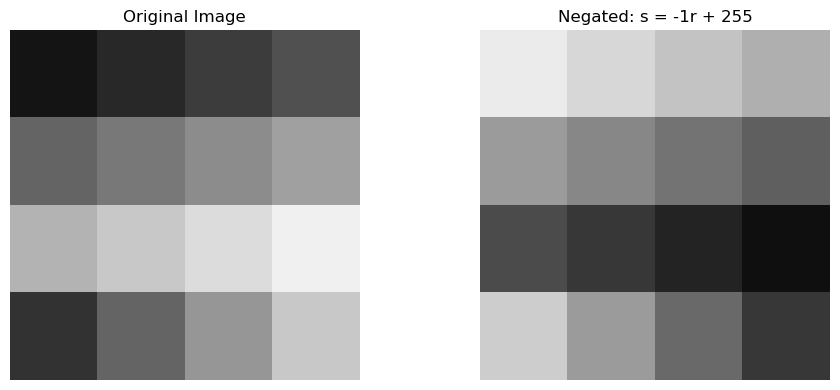

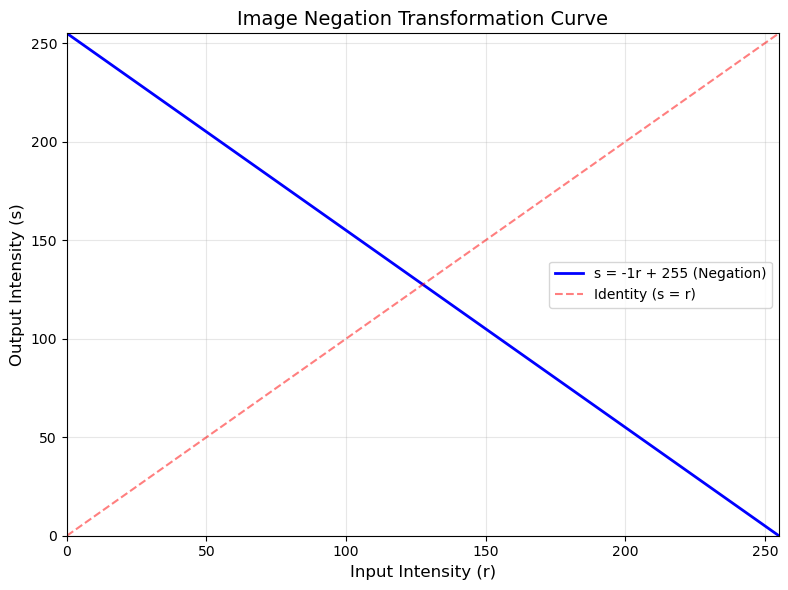


Key Observations:
- Dark pixels (low r) become bright (high s)
- Bright pixels (high r) become dark (low s)
- Middle gray (r=127) stays nearly middle (s=128)
- This is a perfect example of negative contrast (a < 0)


In [24]:
# Create a sample image with different intensity regions
sample_image = np.array([
    [20, 40, 60, 80],
    [100, 120, 140, 160],
    [180, 200, 220, 240],
    [50, 100, 150, 200]
], dtype=np.uint8)

print("Original Image:")
print(sample_image)
print(f"Range: {sample_image.min()} - {sample_image.max()}")

# Apply image negation: s = 255 - r (which is s = -1*r + 255)
a = -1
b = 255
negated_image = np.clip(a * sample_image.astype(np.int16) + b, 0, 255).astype(np.uint8)

# Verify with direct formula
negated_direct = 255 - sample_image

print(f"\nNegated Image (using s = {a}r + {b}):")
print(negated_image)
print(f"Range: {negated_image.min()} - {negated_image.max()}")

print(f"\nVerification (both methods produce same result): {np.array_equal(negated_image, negated_direct)}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(sample_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(negated_image, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Negated: s = {a}r + {b}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show the transformation curve for image negation
r_vals = np.arange(0, 256)
s_vals = -1 * r_vals + 255

plt.figure(figsize=(8, 6))
plt.plot(r_vals, s_vals, 'b-', linewidth=2, label='s = -1r + 255 (Negation)')
plt.plot([0, 255], [0, 255], 'r--', alpha=0.5, label='Identity (s = r)')
plt.xlabel('Input Intensity (r)', fontsize=12)
plt.ylabel('Output Intensity (s)', fontsize=12)
plt.title('Image Negation Transformation Curve', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Dark pixels (low r) become bright (high s)")
print("- Bright pixels (high r) become dark (low s)")
print("- Middle gray (r=127) stays nearly middle (s=128)")
print("- This is a perfect example of negative contrast (a < 0)")